<a href="https://colab.research.google.com/github/adalbertii/phyton-binder/blob/main/wmi_keras_digit_recognition_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Educational Friday: 21.04.2023**
# Construction of neural networks - digit recognition model case


---
Developed by Wojciech Michalski


---



Using the Keras library




---
https://github.com/adalbertii/phyton-binder/blob/main/CEDR%20v.%202.0.pdf

 

Step 1 - Loading the Required Libraries and Modules

In [ ]:
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt

# keras imports for the dataset and building  neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Step 2 - loading MNIST dataset and split into train and test sets.

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Step 3 - checking dataset

In [ ]:
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

In [ ]:
y_train[0]

5

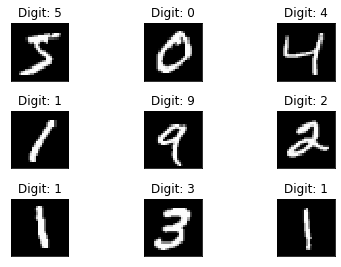

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

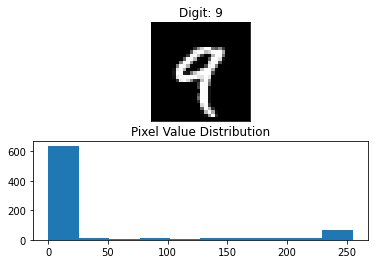

In [ ]:
# checkin value distribution 
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[4], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[4]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [ ]:
#checkng distribution in whole array of y_train dataset
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


Step 4 - reshaping and noramlization

In [ ]:
# the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
#encode our categories - digits from 0 to 9 - using one-hot encoding. The result is a vector with a length equal to the number of categories.
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


Step 5 - building neural network

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
model.summary()

Step 6 - compiling and training model

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

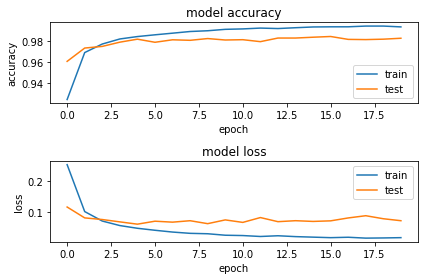

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Step 7 -checking the prediction result

In [ ]:
predicted_classes = model.predict(X_test)


313/313 [==============================] - 1s 3ms/step


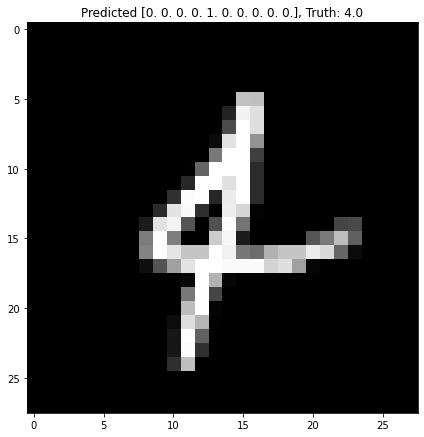

In [ ]:
plt.rcParams['figure.figsize'] = (7,14)

figure = plt.figure()
plt.imshow(X_test[300].reshape(28,28), cmap='gray', interpolation='none')
plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[300], 
                                       y_test[300]))

figure
